# Statistical picture of gang-related crimes in LA - by Ray Gunawidjaja

Data title: "LA crimes"    
*Taken from: https://catalog.data.gov/dataset/crime-data-from-2010-to-present*

<span style="color:red"> DISCLAIMER:   
The information provided here should not be regarded or relied upon as complete. Conclusions delineated in this work are based solely on a single data set. It is your responsibility to thoroughly check the accuracy of the calculations and to validate the conclusions presented within. </span> 


<b> SUMMARY </b>

<b> *1. Questions asked* </b>  
<u> I. Data overview </u>   
1) How quickly/slowly are crimes usually reported?   
* Crimes are generally reported within 1 day.

2) At what times do crimes most frequently occur? 
* Criminal activities are least common between 0:00 and 8:00. It is most common at 12:00. 

3) Which areas show the highest number of reported crimes?   
* 77th Street and Southwest.  

4) How does the crime distribution look like on the map?   
* Plotting the crime locations on a map shows that the data are scattered throughout Los Angeles area, which indicate that the data is representative of the criminal activity in the city.   

<u> II. Time-series analysis </u>  
1) What is the trend in criminal activities like over the past 5 years (2012-2017)? 
* The trend is down from 2012 to 2014, and the trend is up from 2014 to 2017. 
* Based on boxplot, there are no extreme outliers in the monthly time-series data. 
* The monthly percent change is more or less uniform. 

2) Are there correlations between crime types and weapons used?

*There is a strong correlation between:* 
* c624: BATTERY - SIMPLE ASSAULT and w400:STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) with correlation coefficient=0.53*      
* c230: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT and w102: HAND GUN with correlation coefficient=0.72*  

These are consistent with the simple assault involves the use of strong-arm and the assault with deadly weapon involves the use of hand-gun.


<u> III. Demographics for crime types, age, sex, victim descent, and weapon used </u>

1) Overall, how are the criminal activities distributed over the various factors (i.e., crime types, age, sex, victim descent, and weapon used)?  
* The major crime type is: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
* The main age group are teens and 20-40
* The majority of the victim sex is Male
* The majority of victim descent are: 'H - Hispanic/Latin/Mexican', 'W - White', and 'B - Black'
* The majority of the weapon used (over 50%, which is <u>more</u> than any other weapons combined) is 'HAND GUN'

2) For the top ten crime areas how do the demographics look like for the various factors (i.e., crime types, age, sex, victim descent, and weapon used)?  

* A similar picture is generally seen in terms of the age demographic and weapon used between the top ten crime areas and the whole city. However, the distribution over the victim descent and male/female ratio are not; nevertheless, certain victim descents are more predominant in each of these areas. Furthermore, there seems to be no one particular crime type that is predominant in any of the top ten areas.

General observations on the demographics in the top ten crime areas: 

> <u>Male/female ratio</u>
* In N Hollywood and Pacific the victims are predominantly female.
* In the Southeast, the victims are predominantly males.
* In other areas, the victims male/female ratio are more or less the same *

> <u>Victim descent</u>
* H - Hispanic/Latin/Mexican, B - Black, and W - White predominate the population of the victim descent   

> <u>Weapon used</u>  
* The majority of the weapon used is predominantly 400:'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'  

> <u>Crime type</u>  
* The crime type distributions are more or less uniform, but mainly dominated by:* 
            * 624:'BATTERY - SIMPLE ASSAULT'
            * 510:'VEHICLE - STOLEN'
            * 440:'THEFT PLAIN - PETTY ($950 & UNDER)'

3) How is the victim age distributed over the top ten crime areas? </b>  
* The main age distributions are teens and 20-40 years old.* </b>

<b> *2. The trends you investigated* </b>  
Exploratory data analysis (EDA) is performed on criminal reports in the city of Los Angeles over a period of 5 years (2012-2017). The data shows that the majority of the victims are males, who are mainly in their teens or within the age of 20-40. The main crime type is 'BATTERY - SIMPLE ASSAULT' and the main weapon used is a 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'.   

Two areas stand out as outliers in terms of the number of criminal activities (i.e., 77th Street and Southwest). 

Based on pair plots, it is seen that the simple assault is likely to involve the use of strong-arm and the assault with deadly weapon involves the use of hand-gun. 

<b> *3. The resulting visualizations and conclusions* </b>  
These data paint a picture of a gang-related crimes. For a random crime, one would expect a uniform distribution in age range and weapon types; as well as an almost equal distribution of male/female victims. 

EDA reveals similarity in the crime demographic (i.e., crime types, age, sex, victim descent, and weapon used) between the two most crime prone areas and the whole city. This is consistent with LA being notorious as a gang capital of the world. 

*ref.:   
1) http://www.latimes.com/local/crime/la-me-lapd-homicide-20150127-story.html  
2) https://www.reuters.com/article/us-gangs-losangeles-culture/little-glamour-in-l-a-gang-capital-of-america-idUSN0846153020070209  

<b> Additional insights </b>  
Is there a hypothesis you would like to investigate further? 
* What other questions do they lead you to ask? *Can we model...time-series data?*  
* Can we do statistical test to check for significant differences (e.g., ANOVA).
* How does crime in LA compare with national average? Do statistical tests.
* Is gun use increasing? How do gun crimes correlate with recent gun incidents?

As you work out this story, what are some other trends/relationships you think will make it more complete?   
* It is imperative to correlate the crime demographics with the overall population demographics (especially age, sex, and  descent).   
 It is also important to corroborate the conclusions with other independent data sets, as well as with other independent analysis (e.g., compare with LAPD crime statistics reports and with  news reports).   

* Information on population growth may be able to explain the 'V' shape in the criminal activities over the last 5 years.   
* Information on the number and status of victims per reported incident will help to elucidate further the differences between the weapon types. 



In [125]:
#import statements
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import pprint


## I. Data overview

<b> Import data and get a general impression. </b>

In [126]:
#import data set
df=pd.read_csv('Crime_LA_2010_to_Present.csv', parse_dates=True, low_memory=False) #load data

df.head(5) #perform initial inspections


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [300]:
#inspect data types
df.info() 

#The parse_dates command does not convert the Date Reported and Date Occured columns to date, 
#so we need to do the conversion separately.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653649 entries, 223432 to 1647038
Data columns (total 29 columns):
DR Number                 1653649 non-null int64
Date Reported             1653649 non-null datetime64[ns]
Date Occurred             1653649 non-null datetime64[ns]
Time Occurred             1653649 non-null int64
Area ID                   1653649 non-null int64
Area Name                 1653649 non-null object
Reporting District        1653649 non-null int64
Crime Code                1653649 non-null int64
Crime Code Description    1653232 non-null object
MO Codes                  1474251 non-null object
Victim Age                1520247 non-null float64
Victim Sex                1501565 non-null object
Victim Descent            1501530 non-null object
Premise Code              1653572 non-null float64
Premise Description       1650319 non-null object
Weapon Used Code          547497 non-null float64
Weapon Description        547496 non-null object
Status Code         

In [328]:
#Convert first column from string to date
#https://github.com/pandas-dev/pandas/issues/12649

df['Date Occurred']=pd.to_datetime(df['Date Occurred'], format='%m/%d/%Y', errors='raise', infer_datetime_format=False, exact=True) #convert date to date
df['Date Reported']=pd.to_datetime(df['Date Reported'], format='%m/%d/%Y', errors='raise', infer_datetime_format=False, exact=True) #convert date to date

df=df.sort_values('Date Occurred') #sort by dates
df.head(5) #check
#df['Date Of Stop'].dtype #check

#Determine date range
print("Earliest record date:", re.findall(r'^(\d{4}-\d{2}-\d{2})', str(df.iloc[0,2]))[0])
print("Latest record date:", re.findall(r'^(\d{4}-\d{2}-\d{2})', str(df.iloc[-1,2]))[0])


Earliest record date: 2010-01-01
Latest record date: 2017-12-23


<b> 1) How quickly/slowly are crimes usually reported? </b>
* <b> *Crimes are generally reported within 1 day* </b>

In [129]:
#calculate date difference, convert to integer, and report as a histogram

diff=(df['Date Reported']-df['Date Occurred']).dt.days
diff.describe()


count    1.653649e+06
mean     1.662349e+01
std      1.052937e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.907000e+03
dtype: float64

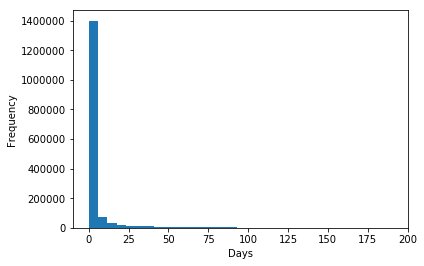

In [130]:
#Generate a histogram of date differences.

plt.hist(diff, bins=500)
plt.xlim([-10,200])

plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


<b> 2) At what times do crimes most frequently occur? </b>

* <b> *Criminal activities are least common between 0:00 and 8:00. It is most common at 12:00* </b>

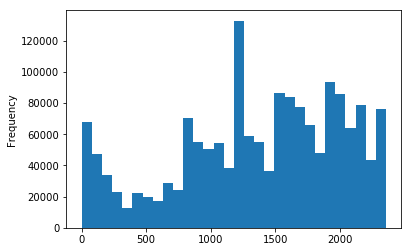

In [131]:
#Genthe time at which crimes occur.

df['Time Occurred'].plot.hist(bins=30)
plt.show()

In [132]:
#Sort frequency of 'Time Occured'

df['Time Occurred'].value_counts().sort_values(ascending=False).head(5)

1200    91943
1800    49173
2000    45923
1900    43735
2200    43264
Name: Time Occurred, dtype: int64

<b> 3) Which area shows the highest number of criminal reports? </b>

* <b> *Determined that <u> 77th Street </u> and <u> Southwest </u> are outliers in terms of the number ofreported crimes. They show up as the two highest reported crime areas.* </b>

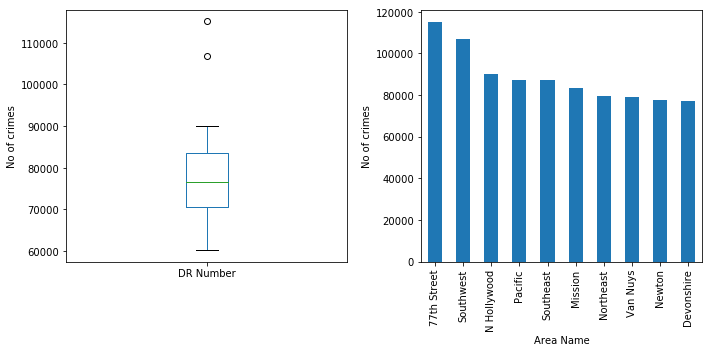

In [133]:
#Aggregate criminal activities by 'Area Name' and determine which areas show the highest number of reported crimes

#df.columns #assess column names
#df['Area Name'].head(5) #assess area names

#aggregate by area name
df_by_area_name=df.groupby('Area Name').count()

#Generate a box plot to determine outliers
plt.subplot(1,2,1)
df_by_area_name['DR Number'].plot.box(figsize=(10,5))
plt.ylabel('No of crimes')

#Sort by DR number and plot bar chart of top ten areas
plt.subplot(1,2,2)
df_by_area_name['DR Number'].sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of crimes')

plt.tight_layout()
plt.show()


<b> 4) How does the crime distribution look like on the map? </b>

* <b> *Plotting the crime locations on a map shows that the data are scattered throughout Los Angeles area, which indicate that the data is representative of the criminal activity in the city.* </b>

In [134]:
#Display crime distribution on a map

type(df.loc[0,'Location ']) #check data type
#It is a type string. Therefore, I need to use regex to split the latitude, longitude coordinates.

#using regex to extract coordinates inside the round brackets
#https://stackoverflow.com/questions/2403122/regular-expression-to-extract-text-between-square-brackets
#append columns to store the parsed coordinates

def parse_location(s):
    #for s in df['Location ']:
    try:
        s2=re.search('(?<=\().*?(?=\))', s).group()
        if s2 != '0, 0':
            return s2
    except:
        pass

df['lat,long']=df['Location '].apply(parse_location) #apply function to columns

df['lat,long'][df['lat,long']=='0,0'].count() #check for null entries

df[['latitude','longitude']] = df['lat,long'].str.split(',', expand=True) #generate two new columns for latitude and longitude
df[['latitude','longitude']].to_csv('lat_long_la_crime.csv')

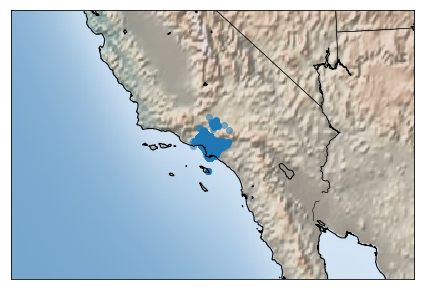

In [135]:
#generate scatter plot on a map using mpl_toolkits
#https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(6,6))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=34.05, lon_0=-118.2,
            width=1.2E6, height=0.8E6)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawstates(color='black')

#add scatterplots as lists into lat and long
lat=df.loc[:,'latitude'].values
lon=df.loc[:,'longitude'].values

m.scatter(lon, lat, latlon=True,
          cmap='Reds', alpha=0.5)

plt.tight_layout()
plt.show()

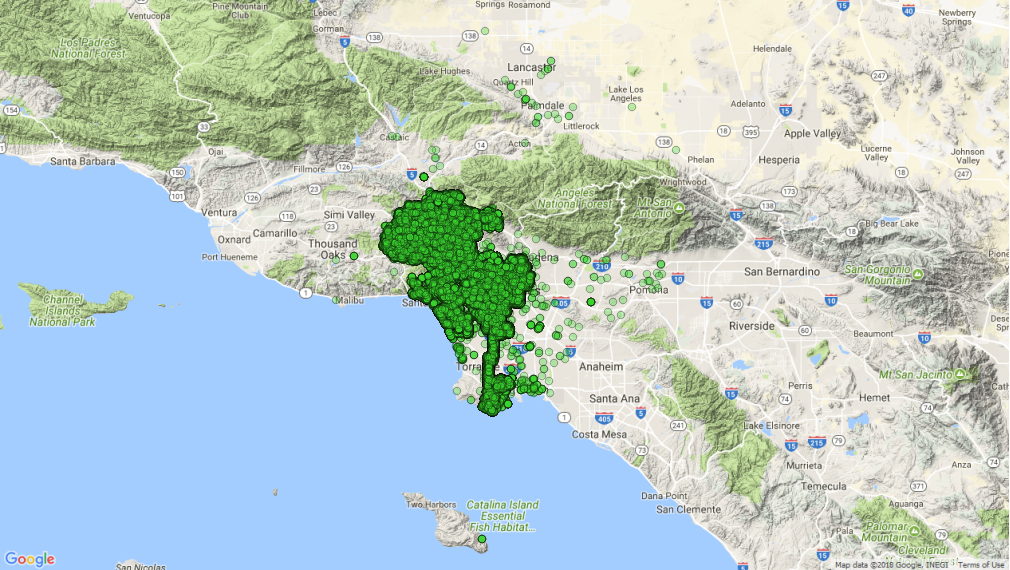

In [136]:
#Generate scatter plot on google map using QGIS software
#QGIS Geographic Information System. Open Source Geospatial Foundation Project. http://qgis.osgeo.org. 

from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='Crime_LA_scatter_plot.png', width=400, height=300)

#It is seen that the crime data covers much of Los Angeles

## II. Time-series analysis

<b> 1) What is the trend in criminal activities like over the past 5 years (2012-2017) </b>
> * <b> *The trend is down from 2012 to 2014, and the trend is up from 2014 to 2017.* </b> 
> * <b> *Based on boxplot, there are no extreme outliers in the monthly time-series data.* </b>
> * <b> *The monthly percent change is more or less uniform.* </b>

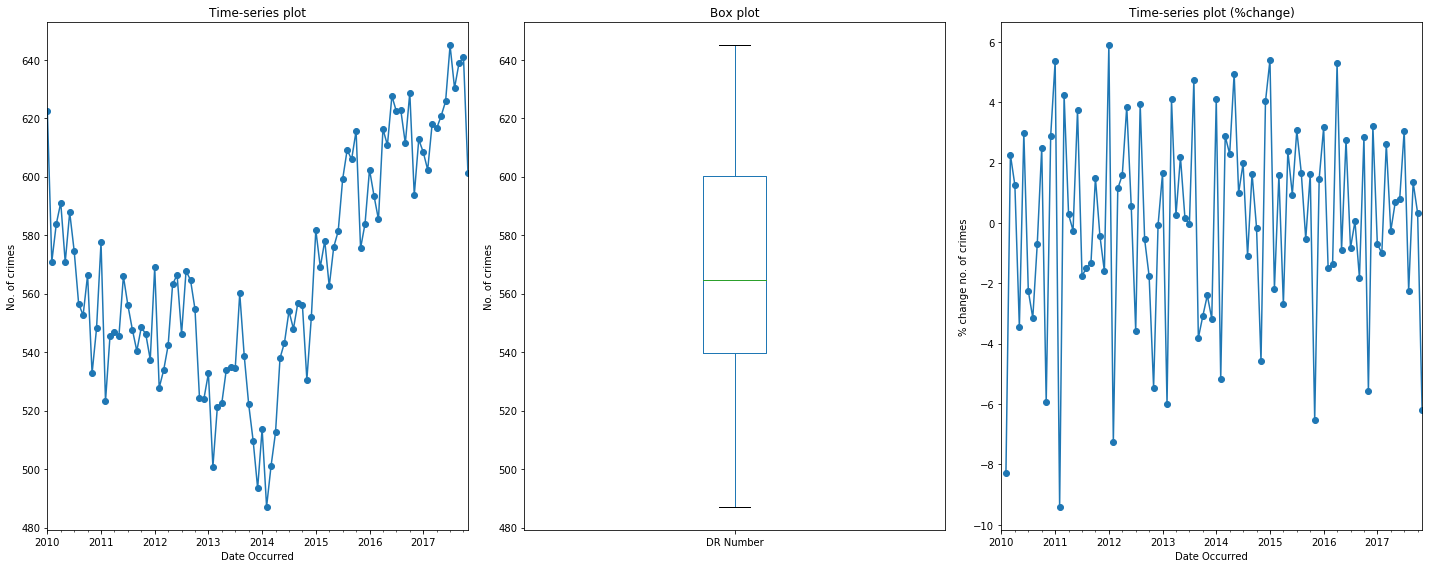

count     95.000000
mean     567.729642
std       37.693711
min      487.107143
25%      539.566667
50%      564.633333
75%      600.163978
max      644.870968
Name: DR Number, dtype: float64

In [137]:
#Do a time-series plot of date occured

df_time_series=df.groupby('Date Occurred').count()

#Generate a time-series plots
plt.subplot(1,3,1)
df_time_series_M=df_time_series.loc[:'2017/11/30','DR Number'].resample('M').mean() #Dec. 2017 dat is excluded because it is incomplete.
df_time_series_M.plot(figsize=(20,8), linestyle='-', marker='o' )

plt.ylabel('No. of crimes')
plt.title('Time-series plot')

#do box plot to identify outliers
plt.subplot(1,3,2)
df_time_series_M.plot.box()
plt.ylabel('No. of crimes')
plt.title('Box plot')

plt.subplot(1,3,3)
#plot a percent change plot
df_time_series_M_pct_change=df_time_series_M.pct_change()*100
df_time_series_M_pct_change.plot(linestyle='-', marker='o' )

plt.ylabel('% change no. of crimes')
plt.title('Time-series plot (%change)')


plt.tight_layout()
plt.show()

#Do statistics
df_time_series_M.describe()

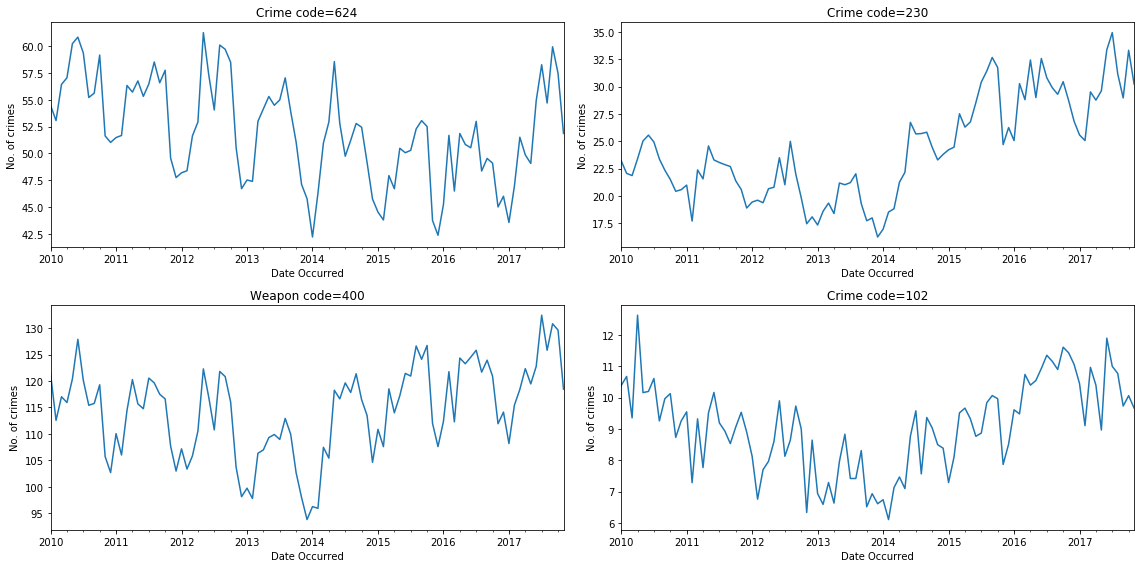

In [236]:
#Look at two violent crimes and weapons (subjectively selected) from top ten list 

#time series plot of crime code 624
#filter first for 624
plt.subplot(2,2,1)
df_c624=df[df['Crime Code']==624].groupby('Date Occurred').count().loc[:'2017/11/30','Crime Code'].resample('M').mean()
df_c624.plot(figsize=(16,8))
plt.ylabel('No. of crimes')
plt.title('Crime code=624')

#time series plot of crime code 230
#filter first for 230
plt.subplot(2,2,2)
df_c230=df[df['Crime Code']==230].groupby('Date Occurred').count().loc[:'2017/11/30','Crime Code'].resample('M').mean()
df_c230.plot()
plt.ylabel('No. of crimes')
plt.title('Crime code=230')

#time series plot of weapon code 400
plt.subplot(2,2,3)
df_w400=df[df['Weapon Used Code']==400].groupby('Date Occurred').count().loc[:'2017/11/30','Weapon Used Code'].resample('M').mean()
df_w400.plot()
plt.ylabel('No. of crimes')
plt.title('Weapon code=400')

#time series plot of weapon code 102
plt.subplot(2,2,4)
df_w102=df[df['Weapon Used Code']==102].groupby('Date Occurred').count().loc[:'2017/11/30','Weapon Used Code'].resample('M').mean()
df_w102.plot()
plt.ylabel('No. of crimes')
plt.title('Crime code=102')


plt.tight_layout()
plt.show()


In [296]:
#correlate the various time-series plots using pair plots.

#combine all DataFrames into one
df_pair_plot=df_c624.copy()
df_pair_plot=pd.concat([df_pair_plot,df_c230,df_w400,df_w102],axis=1)
df_pair_plot.columns=['c624','c230','w400','w102']
df_pair_plot.head(5) #check


,c624,c230,w400,w102
Date Occurred,,,,
2010-01-31,54.483871,23.225806,121.322581,10.387097
2010-02-28,53.071429,22.071429,112.571429,10.678571
2010-03-31,56.451613,21.870968,117.032258,9.354839
2010-04-30,57.066667,23.400000,115.933333,12.633333
2010-05-31,60.258065,25.032258,120.387097,10.161290


<b> 2) Are there correlations between crime types and weapons used? </b>  

<b> *There is a strong correlation between:* </b>    
* <b> *c624: BATTERY - SIMPLE ASSAULT and w400:STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE) with correlation coefficient=0.53* </b>    
* <b> *c230: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT and w102: HAND GUN with correlation coefficient=0.72* </b> 

-These are consistent with the simple assault involves the use of strong-arm and the assault with deadly weapon involves the use of hand-gun.

-Interestingly, the highest correlation coefficient of 0.80 is seen between c230: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT and w400: STRONG-ARM

c624 = {BATTERY - SIMPLE ASSAULT}
c230 = {ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT}
w400 = {STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)}
w102 = {HAND GUN}


A pair-plot correlating crime types with weapons used


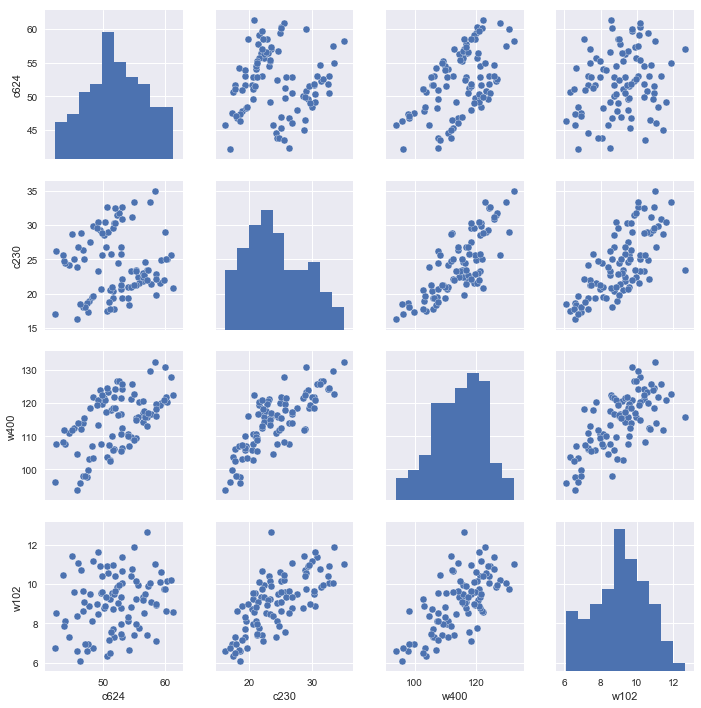

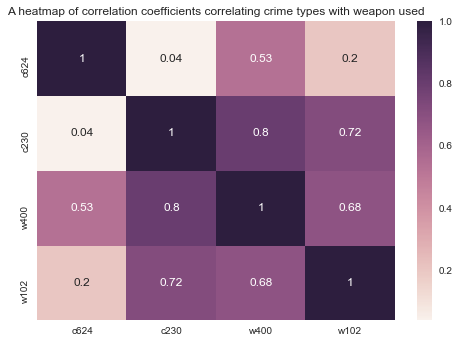

In [340]:
#Generate pair-plots and heatmap of correlation coefficients using seaborn

import seaborn as sns #import seaborn

#Crime Code/Crime Code Description
print('c624 = {BATTERY - SIMPLE ASSAULT}')
print('c230 = {ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT}')


#Weapon Used Code/Weapon Description
print('w400 = {STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)}')
print('w102 = {HAND GUN}')
print('\n')
print('A pair-plot correlating crime types with weapons used')
#Generate a pair-plot
sns.pairplot(df_pair_plot)

#Calculate covariance and draw heatmap
plt.figure()
sns.heatmap(df_pair_plot.corr(), annot=True)
df_pair_plot.cov()
plt.title('A heatmap of correlation coefficients correlating crime types with weapon used')

plt.show()

## III. Demographics for crime types, age, sex, victim descent, and weapon used

<b> 1) Overall, how are the criminal activities distributed over the various factors (i.e., crime types, age, sex, victim descent, and weapon used)? </b>

* <b> *The major crime type is: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'* </b>
* <b> *The main age group are teens and 20-40* </b>
* <b> *The majority of the victim sex is Male* </b>
* <b> *The majority of victim descent are: 'H - Hispanic/Latin/Mexican', 'W - White', and 'B - Black' * </b>
* <b> *The majority of the weapon used (over 50%, which is <u>more</u> than any other weapons combined) is 'HAND GUN'* </b>

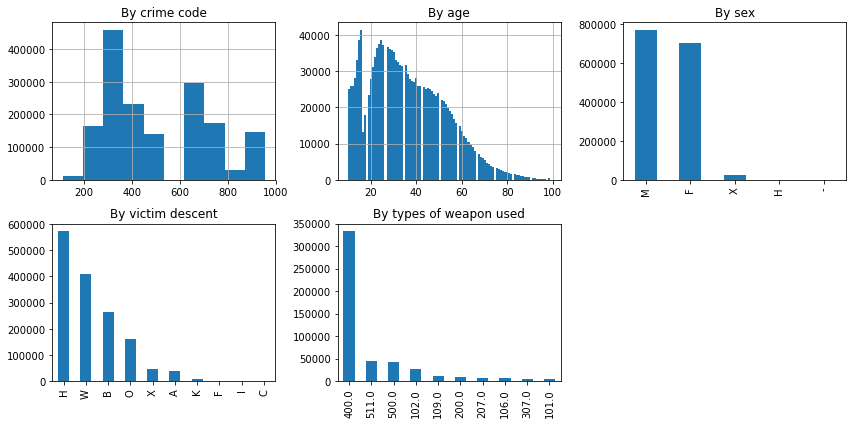

In [138]:
#Generate plots to show distribution of crime types, victim age, victim sex, victim descent, and weapon used.

plt.subplot(2,3,1)
df['Crime Code'].hist(bins=10, figsize=(12,6)) #by crime code 
plt.title('By crime code')

plt.subplot(2,3,2)
df['Victim Age'].hist(bins=100) #by age
plt.title('By age')

plt.subplot(2,3,3)
df['Victim Sex'].dropna().value_counts().plot.bar()
plt.title('By sex')

plt.subplot(2,3,4)
df['Victim Descent'].dropna().value_counts().head(10).plot.bar()
plt.title('By victim descent')

plt.subplot(2,3,5)
df['Weapon Used Code'].dropna().value_counts().head(10).plot.bar()
plt.title('By types of weapon used')


plt.tight_layout()
plt.show()


<b> 2) For the top ten crime areas how are the criminal activities distributed over the various factors (i.e., crime types, age, sex, victim descent, and weapon used)? </b>  

* <b> A similar picture is generally seen in terms of the age demographic and weapon used between the top ten crime areas and the whole city. However, the distribution over the victim descent and male/female ratio are not; nevertheless, certain victim descents are more predominant in each of these areas. Furthermore, there seems to be no one particular crime type that is predominant in any of the top ten areas. </b>


TOP TEN CRIMES
Crime Code/Crime Code Description
624 = {'BATTERY - SIMPLE ASSAULT'}
510 = {'VEHICLE - STOLEN'}
330 = {'BURGLARY FROM VEHICLE'}
310 = {'BURGLARY'}
440 = {'THEFT PLAIN - PETTY ($950 & UNDER)'}
354 = {'THEFT OF IDENTITY'}
626 = {'INTIMATE PARTNER - SIMPLE ASSAULT'}
740 = {'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114'}
745 = {'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'}
230 = {'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'}


TOP TEN WEAPON USED
Weapon Used Code/Weapon Description
400.0 = {'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'}
511.0 = {'VERBAL THREAT'}
500.0 = {'UNKNOWN WEAPON/OTHER WEAPON'}
102.0 = {'HAND GUN'}
109.0 = {'SEMI-AUTOMATIC PISTOL'}
200.0 = {'KNIFE WITH BLADE 6INCHES OR LESS'}
207.0 = {'OTHER KNIFE'}
106.0 = {'UNKNOWN FIREARM'}
307.0 = {'VEHICLE'}
101.0 = {'REVOLVER'}


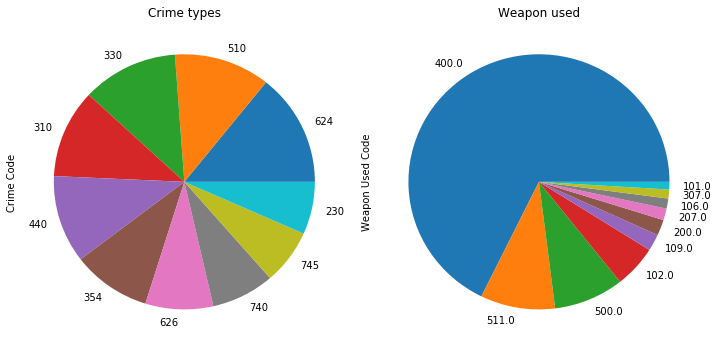

In [139]:
#Determine the top ten crimes and top ten weapon types 

#A. TOP TEN CRIMES
print('TOP TEN CRIMES')
top_ten_crimes=list(df['Crime Code'].value_counts().sort_values(ascending=False).head(10).index)
top_ten_crimes #checked

#Generate Crime Code/Crime Code Description 
print('Crime Code/Crime Code Description')
for crime in top_ten_crimes:
    print(crime,'=',set(df[df['Crime Code']==crime]['Crime Code Description'])) #get the corresponding Crime Code Description given Crime Code

    
#B. TOP TEN WEAPONS USED
print('\n')
print('TOP TEN WEAPON USED')
top_ten_weapons=list(df['Weapon Used Code'].value_counts().sort_values(ascending=False).head(10).index)
top_ten_weapons #checked

#Generate Weapon Used Code/Weapon Description
print('Weapon Used Code/Weapon Description')
for weapon in top_ten_weapons:
    print(weapon,'=',set(df[df['Weapon Used Code']==weapon]['Weapon Description'])) #get the corresponding Crime Code Description given Crime Code

#validate: 
#https://data.lacity.org/resource/7fvc-faax.json?$group=crm_cd_desc&$select=crm_cd_desc%20as%20value,count(*)&$order=count%20desc&$limit=100
# https://data.lacity.org/resource/7fvc-faax.json?$group=weapon_desc&$select=weapon_desc%20as%20value,count(*)&$order=count%20desc&$limit=100    

######################################################################

#show top ten crime types and weapon used in a pie chart

#plot by crime types
plt.subplot(1,2,1)
df['Crime Code'].value_counts().sort_values(ascending=False).head(10).plot.pie(figsize=(10,5))
plt.title('Crime types')

plt.subplot(1,2,2)
#plot by weapon types
df['Weapon Used Code'].value_counts().sort_values(ascending=False).head(10).plot.pie()
plt.title('Weapon used')

plt.tight_layout()
plt.show()


In [140]:
#generate a pandas DataFrame that contain info. on: 'Area Name', 'Victim Age','Victim Sex','Victim Descent','Weapon Used Code','Crime Code'

df_area_age_sex_crime_weapon=df.loc[:,['Area Name','Victim Age','Victim Sex','Victim Descent','Weapon Used Code','Crime Code']]
df_area_age_sex_crime_weapon.head(10).sort_values('Area Name') #check


,Area Name,Victim Age,Victim Sex,Victim Descent,Weapon Used Code,Crime Code
205615,Devonshire,NaN,M,W,NaN,668
205628,Devonshire,55.0,M,O,NaN,354
205636,Devonshire,61.0,F,W,NaN,354
205639,Devonshire,12.0,M,B,400.0,812
205657,Devonshire,42.0,M,W,NaN,354
205564,Foothill,12.0,M,H,NaN,237
205584,Foothill,NaN,F,H,400.0,812
205662,Southeast,47.0,F,B,NaN,354
223432,Southwest,26.0,F,W,500.0,310
223766,Southwest,NaN,NaN,NaN,NaN,510


In [141]:
#Group top ten area names in separate pandas DataFrame
#Each DataFrame contains info on: 'Area Name', 'Victim Age','Victim Sex','Victim Descent','Weapon Used Code','Crime Code'

list_top_ten_area_names=list(df_by_area_name['DR Number'].sort_values(ascending=False).head(10).index)
list_top_ten_area_names

df_top_ten_area_names=[] #a variable for storing DataFrames of each of top_ten_area_names

for name in list_top_ten_area_names:
    df_top_ten_area_names.append(df_area_age_sex_crime_weapon[df_area_age_sex_crime_weapon.loc[:,'Area Name']==name])
    

In [142]:
#Generate a function for plotting stacked bar charts

def generate_stacked_bar_chart(df_list, categories, sub_categories_list):
    """ This function generates stacked bar graphs for each item in a given DataFrame list
        Args:
        df_list=a list of DataFrames
        categories=column name within the DataFrame
        sub_categories_list=a list of items within the specidied column name that will be considered in the stack chart
        Returns:
        stacked bar charts
    """

    df_top_ten_areas_by_cat=pd.DataFrame(columns=sub_categories_list)

    for i in range(len(list_top_ten_area_names)):
        #df_top_ten_areas_by_cat=df_top_ten_areas_by_cat.append(df_top_ten_area_names[i][categories].value_counts())
        df_top_ten_areas_by_cat=df_top_ten_areas_by_cat.append(df_list[i][categories][df_list[i][categories].isin(sub_categories_list)].value_counts())
        
    #rename index
    df_top_ten_areas_by_cat.index=[name for name in list_top_ten_area_names]    

    #express values in percentage
    #https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value
    #calculate sum across rows
    top_ten_areas_by_cat_tot=df_top_ten_areas_by_cat.sum(axis=1)
    top_ten_areas_by_cat_pct=100*df_top_ten_areas_by_cat.div(top_ten_areas_by_cat_tot,axis=0)
    top_ten_areas_by_cat_pct

    #plot stacked bar charts
    top_ten_areas_by_cat_pct.plot.bar(stacked=True)
    #draw horizontal line
    plt.axhline(y=50, linewidth=2, color = 'r')

    plt.ylabel('pct. %s' %(categories))
    plt.xlabel('Area Name')
    plt.legend(bbox_to_anchor=(1.1, 1.0))
    plt.show()


<b> General observations on the demographics in the top ten crime areas: </b>

> <u><b> *Male/female ratio* </b></u>
* <b> *In N Hollywood and Pacific the victims are predominantly female.* </b> 
* <b> *In the Southeast, the victims are predominantly males.* </b>    
* <b> *In other areas, the victims male/female ratio are more or less the same * </b>  

> <u><b> *Victim descent* </b></u>
* <b> *H - Hispanic/Latin/Mexican, B - Black, and W - White predominate the population of the victim descent* </b>  

> <u><b> *Weapon used* </b></u>
* <b> *The majority of the weapon used is predominantly 400:'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'* </b>

> <u><b> *Crime type* </b></u>  
* <b> *The crime type distributions are more or less uniform, but mainly dominated by:* 
            * 624:'BATTERY - SIMPLE ASSAULT'
            * 510:'VEHICLE - STOLEN'
            * 440:'THEFT PLAIN - PETTY ($950 & UNDER)'


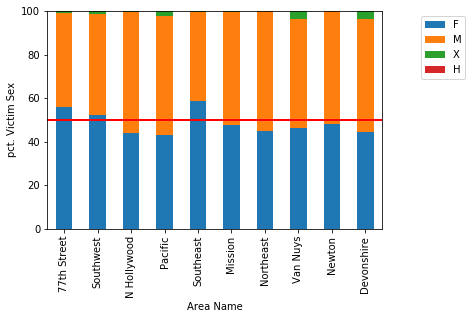

('Descent Code: A - Other Asian; B - Black; C - Chinese; F - Filipino; H - '
 'Hispanic/Latin/Mexican; I - American Indian/Alaskan Native; K - Korean; O - '
 'Other; W - White; X - Unknown')


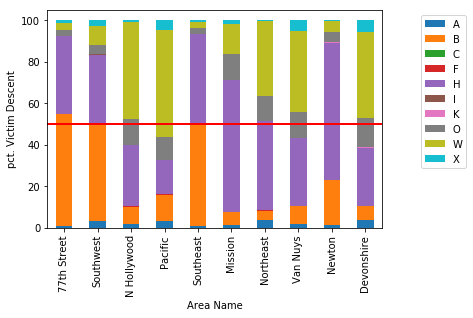

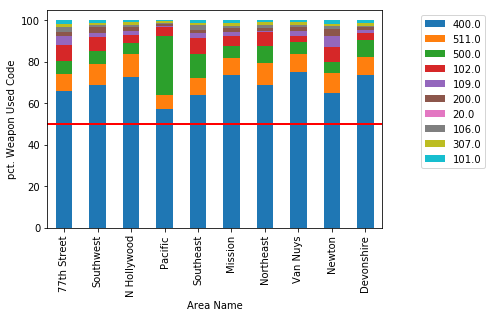

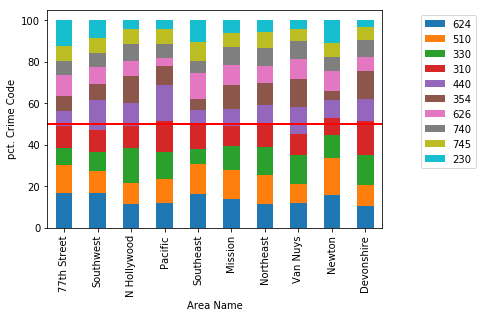

In [143]:
#A. Stacked bar chart categorized by  top ten sex
sex_list=['F','M','X','H']
generate_stacked_bar_chart(df_top_ten_area_names,'Victim Sex',sex_list)

#B. Stacked bar chart categorized by  top ten descent
#https://www.opendatanetwork.com/dataset/data.lacity.org/y8tr-7khq
pprint.pprint('Descent Code: A - Other Asian; B - Black; C - Chinese; F - Filipino; H - Hispanic/Latin/Mexican; I - American Indian/Alaskan Native; K - Korean; O - Other; W - White; X - Unknown')

race_list=['A','B','C','F','H','I','K','O','W','X']
generate_stacked_bar_chart(df_top_ten_area_names,'Victim Descent',race_list)

#C. Stacked bar chart categorized by top ten weapon types
weapon_code_list=[400.0,511.0,500.0,102.0,109.0,200.0,20.0,106.0,307.0,101.0]
generate_stacked_bar_chart(df_top_ten_area_names,'Weapon Used Code',weapon_code_list)

#D. Stacked bar chart categorized by top ten crime types
crime_code_list=[624,510,330,310,440,354,626,740,745,230]
generate_stacked_bar_chart(df_top_ten_area_names,'Crime Code',crime_code_list)

<b> 3) How is the victim age distributed over the top ten crime areas? </b>  
* <b> *The main age distributions are teens and 20-40 years old.* </b>

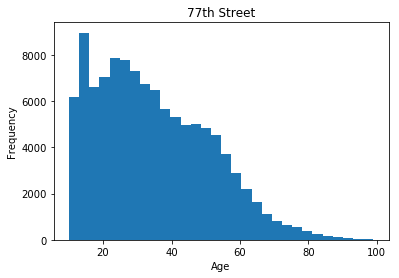

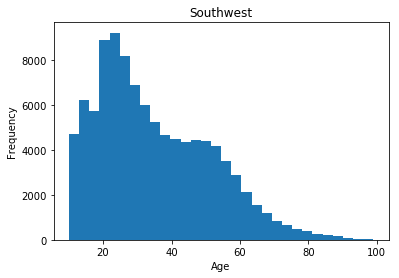

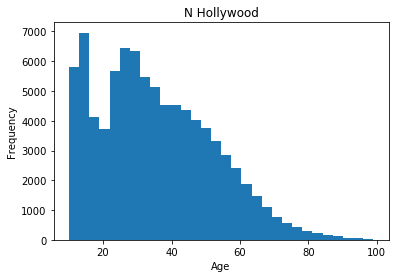

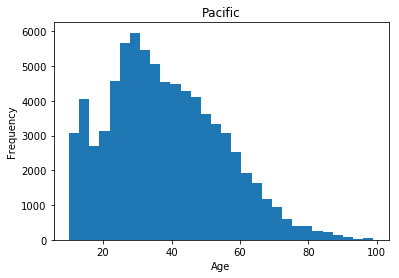

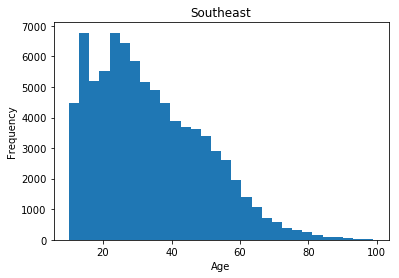

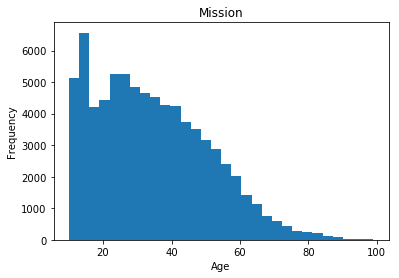

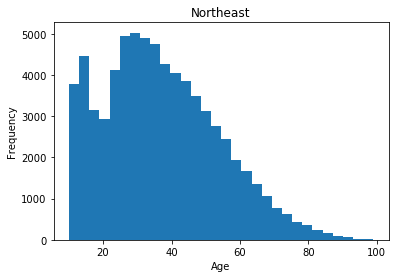

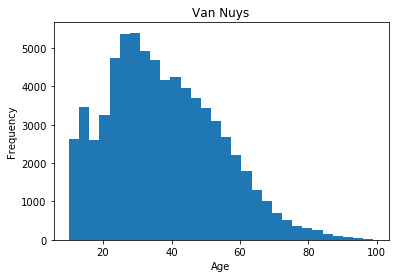

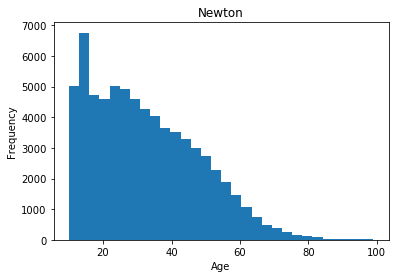

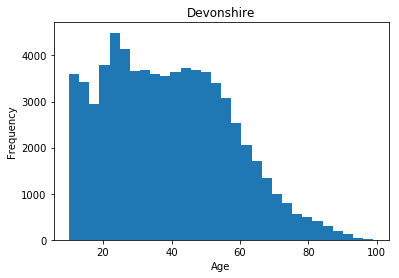

In [144]:
#Show age distribution histograms over the top ten crime areas.

for i,j in enumerate(list_top_ten_area_names):#range(len(df_top_ten_area_names)):
    df_top_ten_area_names[i]['Victim Age'].plot.hist(bins=30)
    plt.xlabel('Age')
    plt.title(j)
    plt.show()